<a href="https://colab.research.google.com/github/RosalesLuis123/IA/blob/main/Parcial2/Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rosales Palma Luis Ignacio,35-5256

# Se hace uso del metodo k-Means en un dataset de regresion Lineal Logistica, el data set es:**Regresion Lineal (Rain in Australia)** ,el numero 178.

# **Conectar Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Importar librerias**

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# **Leer Dataset**

In [ ]:
file_path = '/content/drive/My Drive/Parcial2/weatherAUS.csv'
data = pd.read_csv(file_path)
data = data.iloc[:, 2:]# Reemplazar los valores nulos o vacíos con cero en todo el DataFrame
data.fillna(0, inplace=True)

Funcion para convertir columnas de clase que estan en formato texto a numeros e Float64 de manera automatica

In [ ]:
def convertir_columna_a_int(data, columna):
    # Obtener las categorías únicas en la columna
    categorias_unicas = data[columna].unique()

    # Crear un diccionario para mapear las categorías únicas a valores numéricos
    columna_map = {categoria: idx for idx, categoria in enumerate(categorias_unicas)}

    # Aplicar el mapeo a la columna
    data[columna] = data[columna].map(columna_map)

    # Convertir la columna a tipo int64
    data[columna] = data[columna].astype('float64')

    return data

# Aplicar la función a las columnas especificadas
columnas_a_convertir = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for columna in columnas_a_convertir:
    data = convertir_columna_a_int(data, columna)


In [ ]:

# Eliminar las filas donde 'RainToday' o 'RainTomorrow' tengan un valor de 0
data = data[(data['RainToday'] != 0) & (data['RainTomorrow'] != 0)]

# Mostrar el DataFrame resultante
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,0.0,44.0,0.0,0.0,20.0,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,7.4,25.1,0.0,0.0,0.0,1.0,44.0,1.0,1.0,4.0,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,12.9,25.7,0.0,0.0,0.0,2.0,46.0,0.0,1.0,19.0,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,0.0,0.0,3.0,24.0,2.0,2.0,11.0,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,17.5,32.3,1.0,0.0,0.0,0.0,41.0,3.0,3.0,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,0.0,0.0,15.0,31.0,12.0,2.0,15.0,...,59.0,27.0,1024.7,1021.2,0.0,0.0,9.4,20.9,No,No
145455,2.8,23.4,0.0,0.0,0.0,15.0,31.0,2.0,7.0,13.0,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,3.6,25.3,0.0,0.0,0.0,4.0,22.0,2.0,12.0,13.0,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,5.4,26.9,0.0,0.0,0.0,5.0,37.0,2.0,0.0,9.0,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No


In [ ]:
columnas_a_convertir = ['RainToday', 'RainTomorrow']
for columna in columnas_a_convertir:
    data = convertir_columna_a_int(data, columna)

In [ ]:
print(data)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0          13.4     22.9       0.6          0.0       0.0          0.0   
1           7.4     25.1       0.0          0.0       0.0          1.0   
2          12.9     25.7       0.0          0.0       0.0          2.0   
3           9.2     28.0       0.0          0.0       0.0          3.0   
4          17.5     32.3       1.0          0.0       0.0          0.0   
...         ...      ...       ...          ...       ...          ...   
145454      3.5     21.8       0.0          0.0       0.0         15.0   
145455      2.8     23.4       0.0          0.0       0.0         15.0   
145456      3.6     25.3       0.0          0.0       0.0          4.0   
145457      5.4     26.9       0.0          0.0       0.0          5.0   
145458      7.8     27.0       0.0          0.0       0.0         13.0   

        WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0                44.0         

# **Se nomaliza las caracteristicas**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# **Determinar el número óptimo de clusters**

In [ ]:
inertia = []
silhouette_scores = []
max_clusters = 10  # Máximo número de clusters a probar
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# **Metodo del Codo**

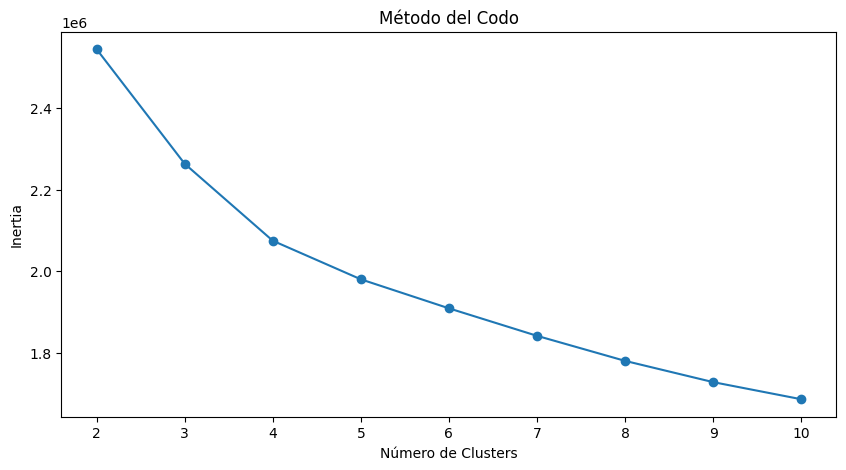

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()

# **Metodo de la Silueta**

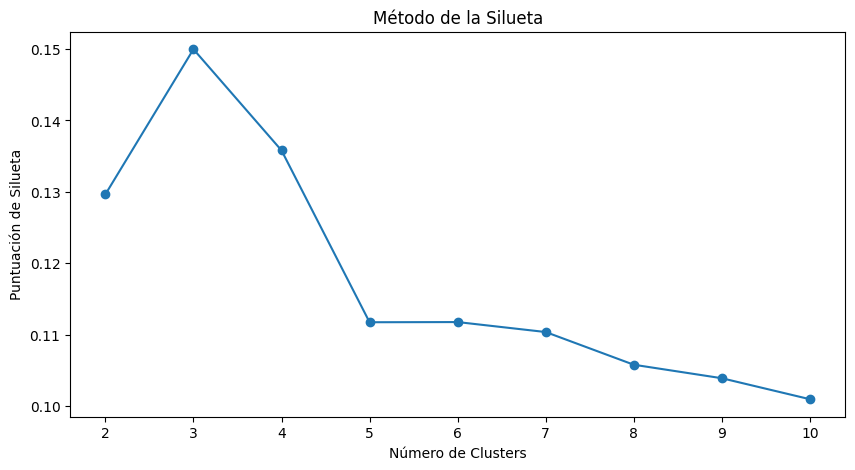

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()

Como se puede apreciar el numero optimo de clusters llega a ser 3 por lo tanto se lo usa ya que es la mejor opcion

# **Entrenamos el Modelo**

In [ ]:
best_k = 3  # Elegir el número óptimo de clusters según el método del codo o de la silueta
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# **Evaluar la cohesión y la separación de los clusters**

In [ ]:
intra_cluster_distances = []
for i in range(best_k):
    cluster_data = scaled_data[kmeans.labels_ == i]
    centroid = kmeans.cluster_centers_[i]
    distances = [sum((point - centroid) ** 2) for point in cluster_data]
    intra_cluster_distances.append(sum(distances) / len(distances))

# Calcular la separación inter-cluster (distancia entre los centroides de los clusters)
inter_cluster_distances = []
for i in range(best_k):
    for j in range(i + 1, best_k):
        distance = sum((kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j]) ** 2)
        inter_cluster_distances.append(distance)

# Mostrar las medidas de evaluación
print("\nMedidas de Evaluación:")
print("Cohesión Intra-Cluster (menor es mejor):", sum(intra_cluster_distances))
print("Separación Inter-Cluster (mayor es mejor):", sum(inter_cluster_distances))


Medidas de Evaluación:
Cohesión Intra-Cluster (menor es mejor): 50.208204555941826
Separación Inter-Cluster (mayor es mejor): 71.39202661609954
